## Getting ready

In [1]:
!pip install bs4

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import requests

In [4]:
# get the HTML

url = "https://www.bankbazaar.com/reviews/andhra-bank/all-products.html?reviewPageNumber=1"
r = requests.get(url)
htmlContent = r.content

In [5]:
# parse the HTML

soup = BeautifulSoup(htmlContent, 'html.parser')

In [6]:
soup.title.text

'ANDHRA BANK Reviews by Ratings & City'

## Accessing only 1 page

In [7]:
containers = soup.find_all(name='li', attrs={'class':'review-box'})
containers[0]

<li class="review-box">
<div class="review-bank-title">
<img alt="andhra Bank" src="https://static.bankbazaar.com/images/common/bank-logo/andhra-bank1.png" title="andhra Bank">
</img></div>
<a class="user-review-comment js-individual-title" data-action="click:titleLink" data-actionloc="reviews:ReviewCards" href="/showUserReviews-1353203-ANDHRA_BANK-CREDIT_CARD.html" target="_blank" title="Good card ">"Good card "</a>
<div class="dontshow" itemscope="" itemtype="http://schema.org/Brand">
<span itemprop="name">
                                            ANDHRA BANK</span>
</div>
<div class="rating-section review-user-score">
<div class="medium-rating rating review-score-container" id="review.reviewRating.customer.0">
<span class="star-rating star-rating-4-0"></span>
<input name="review.reviewRating.customer.0" type="hidden" value="4.0"/>
</div> <span> <span class="dontshow">0.5</span>
<span>4.0</span>/<span>5</span></span> "Great!"
                            </div>
<div class="text_her

In [8]:
first = containers[0]
first.find('div', {'class':'text_here review-desc-more'}).text.strip()

'I have applied Andhra Bank credit card directly through bank and i am using this card more than 1.5 years.  This bank offered a limit around Rs.50k and the interest was low. It has a movie offer reward points, travel benefit and cash back offer.'

In [9]:
first.find('input').get_attribute_list(key='value')[0]

'4.0'

In [10]:
first.find('div',{'class':'reviewer-profile'}).get_attribute_list(key='content')[0]

'2020-03-19'

In [11]:
first.find('span',{'class':'js-author-name'}).text.strip().capitalize()

'Mavoori  m'

In [12]:
first.find('a', {'class':'user-review-comment js-individual-title'}).text.strip('"')

'Good card '

In [13]:
 first.find('div', {'class':'reviewer-profile'}).text.split('\n')[2].strip(', ').capitalize()

'Hyderabad'

In [14]:
# running loop for entire 1st page containers

pname = []
ploc = []
prate = []
preview = []
psummary = []
pdate = []

for container in containers:
  pname.append(container.find('span',{'class':'js-author-name'}).text.strip().capitalize())
  ploc.append(container.find('div', {'class':'reviewer-profile'}).text.split('\n')[2].strip(', ').capitalize())
  prate.append(container.find('input').get_attribute_list(key='value')[0])
  psummary.append(container.find('a', {'class':'user-review-comment js-individual-title'}).text.strip('"'))
  preview.append(container.find('div', {'class':'text_here review-desc-more'}).text.strip())
  pdate.append(container.find('div',{'class':'reviewer-profile'}).get_attribute_list(key='content')[0])

In [15]:
details = list(zip(pname, ploc, prate, pdate, psummary, preview))


df = pd.DataFrame(details, columns =['Name', 'Location', 'Rating', 'Date', 'Summary', 'Review'])
df.head()

,Name,Location,Rating,Date,Summary,Review
0,Mavoori m,Hyderabad,4.0,2020-03-19,Good card,I have applied Andhra Bank credit card directl...
1,R n s n,Mahabubnagar,4.0,2020-03-16,Best savings account,"For the past 8 months, i have been using salar..."
2,G hareesh,Medak,5.0,2020-03-14,Good bank,I have opened my savings account in Andhra Ban...
3,Ga,Vijayawada,5.0,2020-03-08,Need to provide more atm,"When I was working in previous company , they ..."
4,Vas,Vijayawada,5.0,2020-03-08,Good card,I have been using ANDHRA card for more than on...


In [16]:
df.describe()

,Name,Location,Rating,Date,Summary,Review
count,20,20,20,20,20,20
unique,20,10,5,17,14,20
top,Anonymous,Hyderabad,5.0,2020-03-08,Best savings account,"From ANDHRA Bank, i have a savings account whi..."
freq,1,6,9,2,5,1


## Accessing all the pages

In [17]:
pages = np.arange(1,51)   # 50 pages in total, taking in a variable

pname = []
ploc = []
prate = []
preview = []
psummary = []
pdate = []

In [18]:
for page in pages:    # running for every page
  url = "https://www.bankbazaar.com/reviews/andhra-bank/all-products.html?reviewPageNumber="+str(page)
  r = requests.get(url)
  htmlContent = r.content
  soup = BeautifulSoup(htmlContent, 'html.parser')
  containers = soup.find_all(name='li', attrs={'class':'review-box'})
  sleep(randint(3,6))           # sleeping for 3 to 6 secs to control crawling

  for container in containers:
    pname.append(container.find('span',{'class':'js-author-name'}).text.strip().capitalize())
    ploc.append(container.find('div', {'class':'reviewer-profile'}).text.split('\n')[2].strip(', ').capitalize())
    prate.append(container.find('input').get_attribute_list(key='value')[0])
    psummary.append(container.find('a', {'class':'user-review-comment js-individual-title'}).text.strip('"'))
    preview.append(container.find('div', {'class':'text_here review-desc-more'}).text.strip())
    pdate.append(container.find('div',{'class':'reviewer-profile'}).get_attribute_list(key='content')[0])

## Data Frame

In [19]:
details = list(zip(pname, ploc, prate, pdate, psummary, preview))

df = pd.DataFrame(details, columns =['Name', 'Location', 'Rating', 'Date', 'Summary', 'Review'])
df.shape

(1000, 6)

In [20]:
df.head(10)

,Name,Location,Rating,Date,Summary,Review
0,Mavoori m,Hyderabad,4.0,2020-03-19,Good card,I have applied Andhra Bank credit card directl...
1,R n s n,Mahabubnagar,4.0,2020-03-16,Best savings account,"For the past 8 months, i have been using salar..."
2,G hareesh,Medak,5.0,2020-03-14,Good bank,I have opened my savings account in Andhra Ban...
3,Ga,Vijayawada,5.0,2020-03-08,Need to provide more atm,"When I was working in previous company , they ..."
4,Vas,Vijayawada,5.0,2020-03-08,Good card,I have been using ANDHRA card for more than on...
5,S p,Chennai,3.0,2020-02-29,Best savings account,Andhra Bank saving account i am using more tha...
6,Bal t,Chennai,5.0,2020-02-24,Best savings account,I am using ANDHRA Bank savings account more th...
7,Ramesh k a,Hyderabad,5.0,2020-02-21,Good bank,I have been using my savings account from ANDH...
8,Shai,Hyderabad,2.0,2020-02-19,Average service,"From ANDHRA Bank, i have a savings account whi..."
9,B rajesh,Bangalore,4.0,2020-02-19,Need to improve service & technical service ne...,I am using ANDHRA Bank savings account more th...


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df['Rating'].value_counts()

5.0    405
4.0    291
3.0    155
2.0     56
4.5     29
3.5     27
1.0     20
2.5     13
0.5      4
Name: Rating, dtype: int64

In [23]:
df['Rating'] = pd.to_numeric(df['Rating'])

In [24]:
df.describe()

,Rating
count,1000.000000
mean,4.045500
std,1.027246
min,0.500000
25%,3.500000
50%,4.000000
75%,5.000000
max,5.000000


In [25]:
df.head()

,Name,Location,Rating,Date,Summary,Review
0,Mavoori m,Hyderabad,4.0,2020-03-19,Good card,I have applied Andhra Bank credit card directl...
1,R n s n,Mahabubnagar,4.0,2020-03-16,Best savings account,"For the past 8 months, i have been using salar..."
2,G hareesh,Medak,5.0,2020-03-14,Good bank,I have opened my savings account in Andhra Ban...
3,Ga,Vijayawada,5.0,2020-03-08,Need to provide more atm,"When I was working in previous company , they ..."
4,Vas,Vijayawada,5.0,2020-03-08,Good card,I have been using ANDHRA card for more than on...


In [26]:
df['Location'].value_counts()

Hyderabad           532
Bangalore           103
Chennai              89
New delhi            26
Vijayawada           25
Visakhapatnam        22
Mumbai               19
Secunderabad         18
Coimbatore           10
Gurgaon              10
Kolkata              10
Kurnool               9
Pune                  9
Lucknow               7
Nellore               7
Jaipur                7
Tirupati              7
Bhubaneshwar          6
Guntur                6
Khammam               6
Rajahmundry           5
Vizianagaram          5
Ghaziabad             4
Warangal              4
Kochi                 4
Tiruchirapalli        3
Noida                 3
Chandigarh            2
Jajpur                2
Kakinada              2
Anantapur             2
Karimnagar            2
Eluru                 2
Goa                   2
Nagpur                2
Faridabad             2
Madurai               2
Medak                 2
Jabalpur              1
Kolhapur              1
Navi mumbai           1
Adilabad        

In [27]:
# top 5 locations having least rating

df.groupby(['Location']).agg({'Rating':'mean'}).reset_index().sort_values(by=['Rating'], ascending=True).head(5)

,Location,Rating
26,Karimnagar,0.5
19,Hosur,2.0
16,Goa,2.5
0,Adilabad,3.0
31,Kota,3.0


## Word Cloud

In [40]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import gensim, nltk, re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
only_reviews = "++".join(df['Review'])

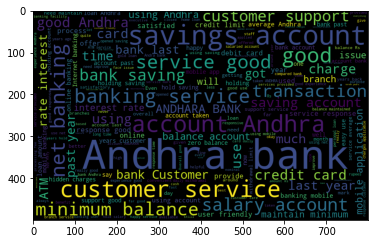

In [42]:
wc = WordCloud(width=800, height=500)
plt.imshow(wc.generate_from_text(only_reviews))

In [43]:
STOPWORDS.add('Andhra')

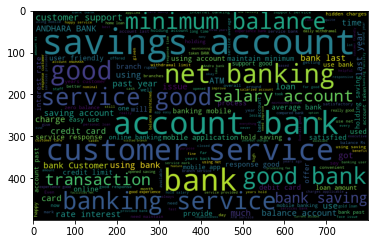

In [44]:
plt.imshow(wc.generate_from_text(only_reviews))

## Bigrams

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [49]:
review_raw = df['Review']
review_raw[0]

'I have applied Andhra Bank credit card directly through bank and i am using this card more than 1.5 years.  This bank offered a limit around Rs.50k and the interest was low. It has a movie offer reward points, travel benefit and cash back offer.'

In [50]:
lemmatizer = WordNetLemmatizer()

In [51]:
def plot_bigram_wordcloud(review_raw, pattern = "[a-z']+", n_bigrams=200):

  token_pattern = pattern
  tokenizer = nltk.tokenize.RegexpTokenizer(token_pattern)
  texts_in_tokens = []

  for text in review_raw:
    tokens = tokenizer.tokenize(text.lower())
    tokens_no_stopwords = [lemmatizer.lemmatize(word) for word in tokens if word not in STOPWORDS]
    texts_in_tokens.append(tokens_no_stopwords)

  bigrams = gensim.models.Phrases(texts_in_tokens, threshold=5)
  bigram_list = list(bigrams[texts_in_tokens])              # contain all possible bigrams
  all_bigrams = [w for s in bigram_list for w in s]       # it will have bigrams and unigrams
  only_bigrams = [w for w in all_bigrams if re.findall("[a-z]+_[a-z]+", w)]   # getting only the bigrams (2 words with _ in between)
  C = Counter(only_bigrams)                             # counter to count bigrams
  word_freq = {k:v for k,v in C.most_common(n_bigrams)}   # storing most common bigrams in word_freq
  wc = WordCloud(width=1000, height=600)
  plt.figure(figsize=(10,6))
  plt.imshow(wc.generate_from_frequencies(word_freq))

  return {'stopword_free_text':texts_in_tokens, 'word_freq_bigrams':C}    # returns all tokens & bigrams with count of appearances

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


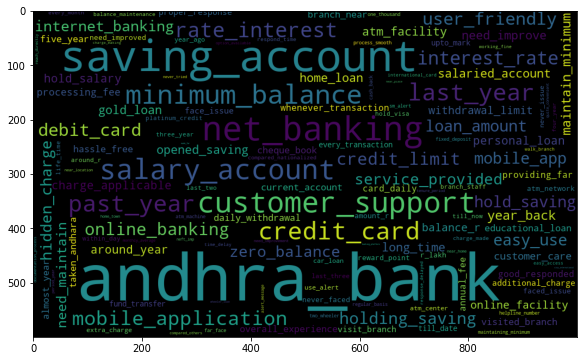

In [52]:
p = plot_bigram_wordcloud(review_raw)

In [39]:
p['word_freq_bigrams']

Counter({'additional_charge': 14,
         'alert_message': 6,
         'almost_year': 18,
         'amount_r': 12,
         'amount_within': 1,
         'andhra_bank': 1233,
         'annual_fee': 16,
         'app_easy': 1,
         'application_easy': 2,
         'around_r': 10,
         'around_year': 26,
         'atm_center': 11,
         'atm_facility': 30,
         'atm_machine': 8,
         'atm_network': 12,
         'back_hold': 1,
         'back_offered': 2,
         'balance_maintained': 1,
         'balance_maintenance': 9,
         'balance_r': 23,
         'banking_platform': 3,
         'branch_near': 20,
         'branch_staff': 10,
         'car_loan': 11,
         'card_daily': 16,
         'cash_back': 8,
         'charge_applicable': 25,
         'charge_made': 9,
         'charge_making': 5,
         'cheque_book': 17,
         'compared_nationalized': 9,
         'compared_others': 6,
         'credit_card': 119,
         'credit_limit': 59,
         'current_ac